In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys

sys.path.append("../")

from tqdm import tqdm_notebook
from src import HeavyBall, SimpleMuFunc


In [2]:
class SimpleMuEnemy(SimpleMuFunc):
    def estimation_grad(self, x, direction_point, x_star):
        g = self.grad(x)
        size = self.alpha * np.linalg.norm(g)
        diff = direction_point - x_star
        noise = diff / np.linalg.norm(diff) * size
        est = g - noise
        return est

In [10]:
def plot(iters: int = 100):
    mu = 1
    L = 100
    start = np.ones(2) * 100
    start = np.array([0, 100])
    simple = SimpleMuEnemy(L=L, mu=mu, alpha=0.005)
    heavy = HeavyBall(start=start, L=L, mu=mu, func=simple)
    nesterov_true = SimpleMuEnemy(L=L, mu=mu, alpha=0)
    heavy_true = HeavyBall(start=start, L=L, mu=mu, func=nesterov_true)

    for _ in tqdm_notebook(range(iters)):
        heavy.step()
        heavy_true.step()
    with sns.plotting_context("notebook"), sns.axes_style("darkgrid"):
        plt.figure(figsize=(10, 6), dpi=120)
        xs = heavy.history
        xst = heavy_true.history
        values = [simple(x) for x in xs]
        plt.plot(np.arange(len(xs)), values, label="Noise")
        plt.plot(np.arange(len(xs)), [simple(x) for x in xst], label="Real")
        # plt.semilogy(np.arange(len(xs)), 100 / (1 + np.arange(len(xs))) ** 2)
        plt.legend()
        plt.show()
    return xs

/tmp/ipykernel_83899/2812838538.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for _ in tqdm_notebook(range(iters)):


  0%|          | 0/100 [00:00<?, ?it/s]

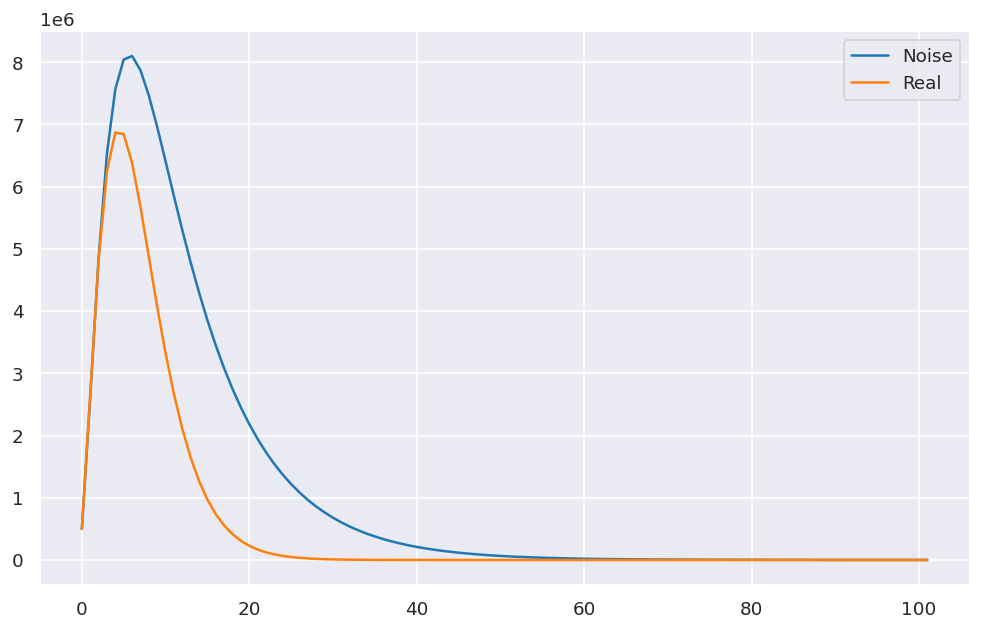

[array([  0, 100]),
 array([   0.        , -228.92561983]),
 array([  0.        , 311.44730551]),
 array([   0.        , -361.54120575]),
 array([  0.        , 389.09925127]),
 array([   0.        , -401.11580651]),
 array([  0.        , 402.52993347]),
 array([   0.        , -396.82319311]),
 array([  0.        , 386.44391745]),
 array([   0.        , -373.10830452]),
 array([  0.        , 358.01407927]),
 array([   0.        , -341.99209246]),
 array([  0.        , 325.61386835]),
 array([   0.       , -309.2678858]),
 array([  0.        , 293.21366796]),
 array([   0.        , -277.62012266]),
 array([  0.        , 262.59270601]),
 array([   0.       , -248.1926551]),
 array([  0.        , 234.45059366]),
 array([   0.        , -221.37614603]),
 array([  0.        , 208.96471999]),
 array([   0.        , -197.20228239]),
 array([  0.        , 186.06871206]),
 array([   0.        , -175.54014495]),
 array([  0.        , 165.59060589]),
 array([   0.        , -156.19313584]),
 array([

In [11]:
plot(100)